In [ ]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

In [57]:
#import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


#read data in dataframe using pandas

d0 = pd.read_csv('./train.csv')

# read first 5 rows using head function

print(d0.head(5))

# save the labels into new variable l.

l = d0['label']

# Drop the feature label and stores all other data in new variable d

d = d0.drop("label", axis=1)




   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [58]:
# print d

print('-----------------------------------------------------------')
print(d.head(5))

#print l
print('-----------------------------------------------------------')
print(l.head(5))

-----------------------------------------------------------
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel

In [59]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


0


C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


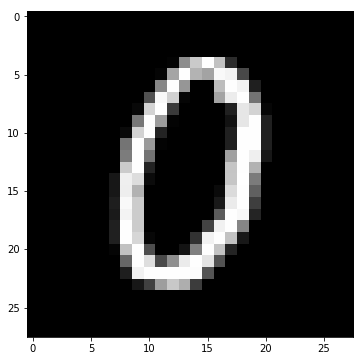

In [60]:
# Display a label as plot
plt.figure(figsize=(6,6))
idx = 5

# reshaping from 1D to 2D array
grid_data = d.iloc[idx].as_matrix().reshape(28,28)

#plot 
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show

print(l[idx])

In [61]:
labels = l.head(42000)
data = d.head(42000)


print(data.shape)

(42000, 784)


In [62]:
# data-preprocessing : standardizing the data 

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\HP-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\HP-PC\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [63]:
print(standardized_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
# finding the co-variance matrix i.e.- A^T * A

sample_data = standardized_data

# matrix multiplication using numpy

covar_matrix = np.matmul(sample_data.T , sample_data)

print("shape of co-variance matrix = ", covar_matrix.shape)

shape of co-variance matrix =  (784, 784)


In [65]:
covar_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
# T-SNE using scikit-learn
from sklearn.manifold import TSNE

#Picking top 1500 points as TSNE takes a lot time to execute for all 42k point

data_1500 = standardized_data[:1500,:]
labels_1500 = labels[:1500]

#configration of the paramters
# for this instance
# no. of components = 2
# default perplexity = 30
# default learning rate = 200
# default max number of iteration for optimization = 1000

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)


shape of data after Tsne (1500, 2)


In [67]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)


shape of data after lables =  (1500, 3)


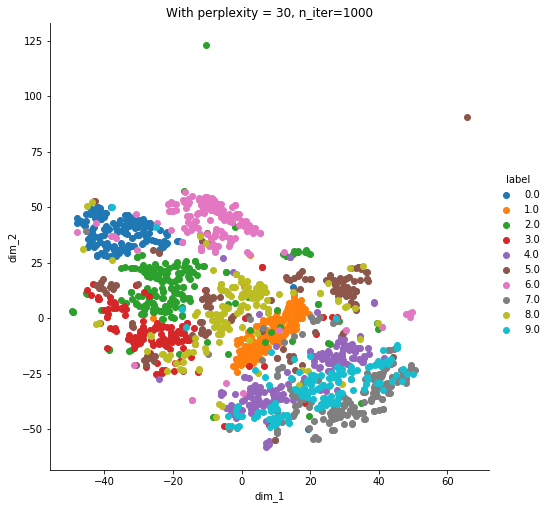

In [68]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 30, n_iter=1000')
plt.show()

#this plot shown only using 1500 points therefore it may not be accurate
# but important is that our function tsne worked well for dimenionality reduction
# as tsne is and randomized function we need to always iterate it using diffrent parameters
# below we will plot graphs with diffrent parameters.

In [69]:
# change the perplexity to 50 
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)

shape of data after Tsne (1500, 2)


In [70]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


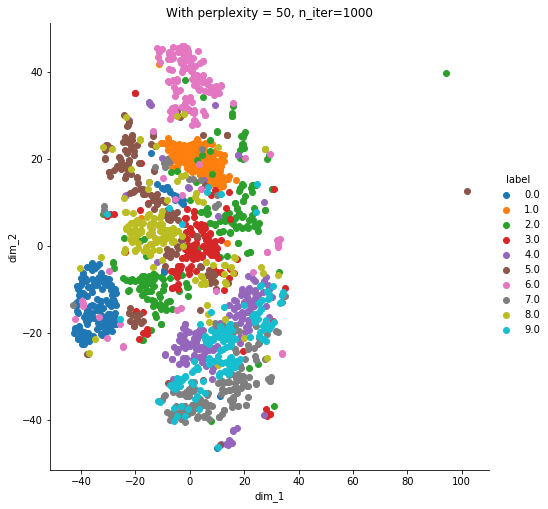

In [71]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 50, n_iter=1000')
plt.show()

In [72]:
# change the perplexity to 100 
model = TSNE(n_components=2, random_state=0, perplexity=100)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)

shape of data after Tsne (1500, 2)


In [73]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


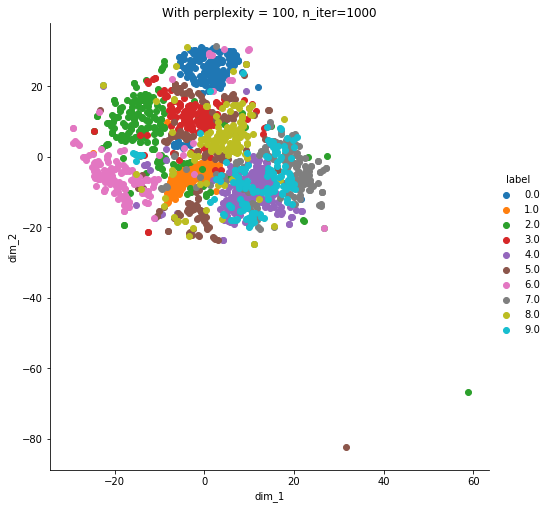

In [74]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 100, n_iter=1000')
plt.show()

In [75]:
# change the perplexity to 200 
model = TSNE(n_components=2, random_state=0, perplexity=200)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)

shape of data after Tsne (1500, 2)


In [76]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


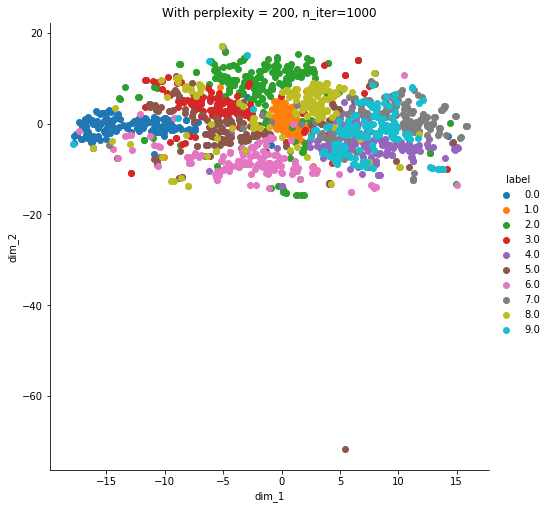

In [77]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 200, n_iter=1000')
plt.show()

In [78]:
# change the perplexity to 2 
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)

shape of data after Tsne (1500, 2)


In [79]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


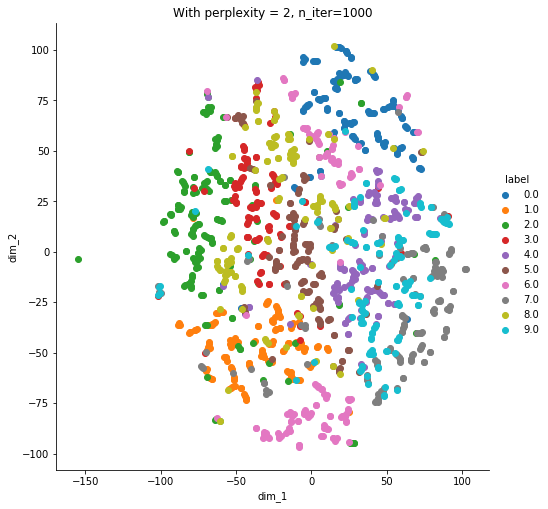

In [80]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 2, n_iter=1000')
plt.show()

In [81]:
# changing the default max number of iteration for optimization = 5000, perplexity = 50
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)


shape of data after Tsne (1500, 2)


In [82]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


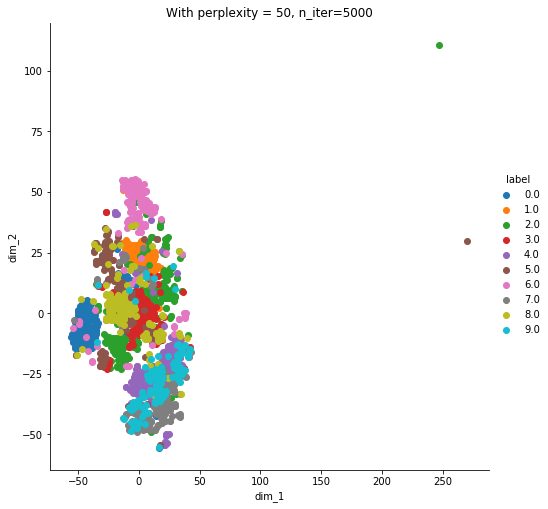

In [83]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

In [84]:
# changing the default max number of iteration for optimization = 5000, perplexity = 100
model = TSNE(n_components=2, random_state=0, perplexity=100,  n_iter=5000)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)


shape of data after Tsne (1500, 2)


In [85]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


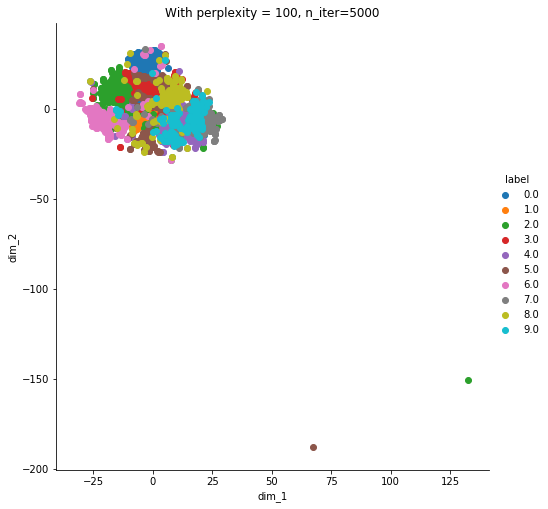

In [86]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 100, n_iter=5000')
plt.show()

In [87]:
# changing the default max number of iteration for optimization = 5000, perplexity = 2
model = TSNE(n_components=2, random_state=0, perplexity=2,  n_iter=5000)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)

shape of data after Tsne (1500, 2)


In [88]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


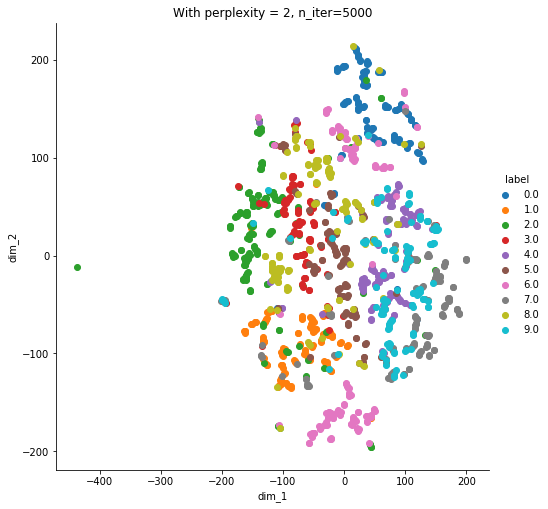

In [89]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 2, n_iter=5000')
plt.show()

In [90]:
# changing the default max number of iteration for optimization = 2000, perplexity = 50
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=2000)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)

shape of data after Tsne (1500, 2)


In [91]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


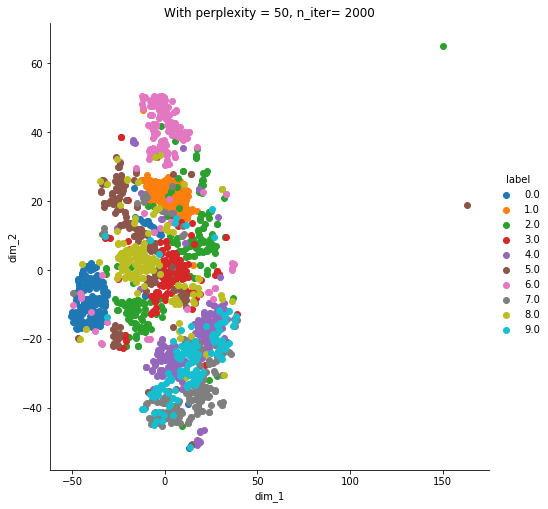

In [92]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 50, n_iter= 2000')
plt.show()

In [93]:
# changing the default max number of iteration for optimization = 2000, perplexity = 30
model = TSNE(n_components=2, random_state=0, perplexity=30,  n_iter=2000)
tsne_data = model.fit_transform(data_1500)
print("shape of data after Tsne", tsne_data.shape)

shape of data after Tsne (1500, 2)


In [94]:
# crating a new data frame for plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1500)).T
print("shape of data after lables = ", tsne_data.shape)

shape of data after lables =  (1500, 3)


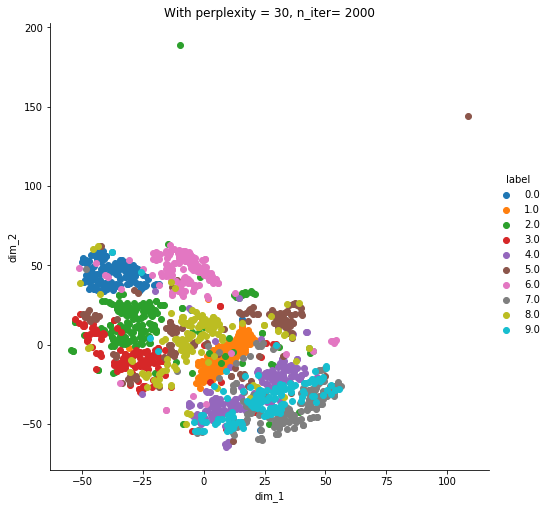

In [95]:
tsne_df = pd.DataFrame(data = tsne_data, columns=("dim_1", "dim_2","label"))

#plotting the result obtained from the above TSNE
sn.FacetGrid(tsne_df, hue="label", height=7).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.title('With perplexity = 30, n_iter= 2000')
plt.show()